## Australian Housing Prices prediction

This dataset can be used to predict housing prices in Australia.

This dataset can be used to find relationships between housing prices and location.

This dataset can be used to find relationships between housing prices and features such as size, number of bedrooms, and number of bathrooms

In [2]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("C:/Users/nvsiv/OneDrive/Desktop/Assignment 1/Assignment 9/RealEstateAU_1000_Samples.csv")
df

index      TID          breadcrumb  \
0        0  1350988  Buy>NT>DARWIN CITY   
1        1  1350989  Buy>NT>DARWIN CITY   
2        2  1350990  Buy>NT>DARWIN CITY   
3        3  1350991  Buy>NT>DARWIN CITY   
4        4  1350992  Buy>NT>DARWIN CITY   
..     ...      ...                 ...   
995    995  1351983       Buy>NT>DARWIN   
996    996  1351984       Buy>NT>DARWIN   
997    997  1351985       Buy>NT>DARWIN   
998    998  1351986       Buy>NT>DARWIN   
999    999  1351987       Buy>NT>DARWIN   

                                         category_name property_type  \
0    Real Estate & Property for sale in DARWIN CITY...         House   
1    Real Estate & Property for sale in DARWIN CITY...     Apartment   
2    Real Estate & Property for sale in DARWIN CITY...          Unit   
3    Real Estate & Property for sale in DARWIN CITY...         House   
4    Real Estate & Property for sale in DARWIN CITY...          Unit   
..                                                 ...           ...   
995  Real Estate & Property for sale in DARWIN, NT ...         House   
996  Real Estate & Property for sale in DARWIN, NT ...         House   
997  Real Estate & Property for sale in DARWIN, NT ...         House   
998  Real Estate & Property for sale in DARWIN, NT ...         House   
999  Real Estate & Property for sale in DARWIN, NT ...          Unit   

    building_size land_size preferred_size           open_date  \
0             NaN       NaN            NaN   Added 2 hours ago   
1           171m²       NaN          171m²   Added 7 hours ago   
2             NaN       NaN            NaN  Added 22 hours ago   
3             NaN       NaN            NaN     Added yesterday   
4           201m²       NaN          201m²     Added yesterday   
..            ...       ...            ...                 ...   
995           NaN    9.17ha         9.17ha         Under offer   
996         203m²     600m²          600m²                 NaN   
997       209.6m²     800m²          800m²                 NaN   
998         180m²     450m²          450m²                 NaN   
999         120m²       NaN          120m²                 NaN   

                                      listing_agency  ... state  zip_code  \
0                        Professionals - DARWIN CITY  ...    NT       800   
1    Nick Mousellis Real Estate - Eview Group Member  ...    NT       800   
2                  Habitat Real Estate - THE GARDENS  ...    NT       800   
3                             Ray White - NIGHTCLIFF  ...    NT       800   
4                Carol Need Real Estate - Fannie Bay  ...    NT       800   
..                                               ...  ...   ...       ...   
995                         United Realty NT - Parap  ...    NT       834   
996           Kassiou Constructions - HOWARD SPRINGS  ...    NT       836   
997           Kassiou Constructions - HOWARD SPRINGS  ...    NT       836   
998           Kassiou Constructions - HOWARD SPRINGS  ...    NT       810   
999                            Home Zone NT - DARWIN  ...    NT       820   

            phone latitude longitude product_depth bedroom_count  \
0    08 8941 8289      NaN       NaN      premiere           2.0   
1      0411724000      NaN       NaN      premiere           3.0   
2    08 8981 0080      NaN       NaN      premiere           2.0   
3    08 8982 2403      NaN       NaN      premiere           1.0   
4      0418885966      NaN       NaN      premiere           3.0   
..            ...      ...       ...           ...           ...   
995  08 8981 2666      NaN       NaN       feature           4.0   
996   08 89834326      NaN       NaN      standard           4.0   
997   08 89834326      NaN       NaN      standard           4.0   
998   08 89834326      NaN       NaN      standard           4.0   
999  0418 895 345      NaN       NaN       feature           2.0   

    bathroom_count  parking_count              RunDate  
0              1.0            1

In [4]:
df.head()

index      TID          breadcrumb  \
0      0  1350988  Buy>NT>DARWIN CITY   
1      1  1350989  Buy>NT>DARWIN CITY   
2      2  1350990  Buy>NT>DARWIN CITY   
3      3  1350991  Buy>NT>DARWIN CITY   
4      4  1350992  Buy>NT>DARWIN CITY   

                                       category_name property_type  \
0  Real Estate & Property for sale in DARWIN CITY...         House   
1  Real Estate & Property for sale in DARWIN CITY...     Apartment   
2  Real Estate & Property for sale in DARWIN CITY...          Unit   
3  Real Estate & Property for sale in DARWIN CITY...         House   
4  Real Estate & Property for sale in DARWIN CITY...          Unit   

  building_size land_size preferred_size           open_date  \
0           NaN       NaN            NaN   Added 2 hours ago   
1         171m²       NaN          171m²   Added 7 hours ago   
2           NaN       NaN            NaN  Added 22 hours ago   
3           NaN       NaN            NaN     Added yesterday   
4         201m²       NaN          201m²     Added yesterday   

                                    listing_agency  ... state  zip_code  \
0                      Professionals - DARWIN CITY  ...    NT       800   
1  Nick Mousellis Real Estate - Eview Group Member  ...    NT       800   
2                Habitat Real Estate - THE GARDENS  ...    NT       800   
3                           Ray White - NIGHTCLIFF  ...    NT       800   
4              Carol Need Real Estate - Fannie Bay  ...    NT       800   

          phone latitude longitude product_depth bedroom_count bathroom_count  \
0  08 8941 8289      NaN       NaN      premiere           2.0            1.0   
1    0411724000      NaN       NaN      premiere           3.0            2.0   
2  08 8981 0080      NaN       NaN      premiere           2.0            1.0   
3  08 8982 2403      NaN       NaN      premiere           1.0            1.0   
4    0418885966      NaN       NaN      premiere           3.0            2.0   

   parking_count              RunDate  
0            1.0  2022-05-27 15:54:05  
1            2.0  2022-05-27 15:54:05  
2            1.0  2022-05-27 15:54:05  
3            0.0  2022-05-27 15:54:05  
4            2.0  2022-05-27 15:54:05  

[5 rows x 27 columns]

In [5]:
df.tail()

index      TID     breadcrumb  \
995    995  1351983  Buy>NT>DARWIN   
996    996  1351984  Buy>NT>DARWIN   
997    997  1351985  Buy>NT>DARWIN   
998    998  1351986  Buy>NT>DARWIN   
999    999  1351987  Buy>NT>DARWIN   

                                         category_name property_type  \
995  Real Estate & Property for sale in DARWIN, NT ...         House   
996  Real Estate & Property for sale in DARWIN, NT ...         House   
997  Real Estate & Property for sale in DARWIN, NT ...         House   
998  Real Estate & Property for sale in DARWIN, NT ...         House   
999  Real Estate & Property for sale in DARWIN, NT ...          Unit   

    building_size land_size preferred_size    open_date  \
995           NaN    9.17ha         9.17ha  Under offer   
996         203m²     600m²          600m²          NaN   
997       209.6m²     800m²          800m²          NaN   
998         180m²     450m²          450m²          NaN   
999         120m²       NaN          120m²          NaN   

                             listing_agency  ... state  zip_code  \
995                United Realty NT - Parap  ...    NT       834   
996  Kassiou Constructions - HOWARD SPRINGS  ...    NT       836   
997  Kassiou Constructions - HOWARD SPRINGS  ...    NT       836   
998  Kassiou Constructions - HOWARD SPRINGS  ...    NT       810   
999                   Home Zone NT - DARWIN  ...    NT       820   

            phone latitude longitude product_depth bedroom_count  \
995  08 8981 2666      NaN       NaN       feature           4.0   
996   08 89834326      NaN       NaN      standard           4.0   
997   08 89834326      NaN       NaN      standard           4.0   
998   08 89834326      NaN       NaN      standard           4.0   
999  0418 895 345      NaN       NaN       feature           2.0   

    bathroom_count  parking_count              RunDate  
995            3.0            6.0  2022-05-27 15:54:05  
996            2.0            2.0  2022-05-27 15:54:05  
997            2.0            2.0  2022-05-27 15:54:05  
998            2.0            3.0  2022-05-27 15:54:05  
999            2.0            2.0  2022-05-27 15:54:05  

[5 rows x 27 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1000 non-null   int64  
 1   TID              1000 non-null   int64  
 2   breadcrumb       1000 non-null   object 
 3   category_name    1000 non-null   object 
 4   property_type    1000 non-null   object 
 5   building_size    280 non-null    object 
 6   land_size        533 non-null    object 
 7   preferred_size   609 non-null    object 
 8   open_date        302 non-null    object 
 9   listing_agency   1000 non-null   object 
 10  price            1000 non-null   object 
 11  location_number  1000 non-null   int64  
 12  location_type    1000 non-null   object 
 13  location_name    1000 non-null   object 
 14  address          988 non-null    object 
 15  address_1        988 non-null    object 
 16  city             1000 non-null   object 
 17  state          

In [7]:
df.isnull().sum()

index                 0
TID                   0
breadcrumb            0
category_name         0
property_type         0
building_size       720
land_size           467
preferred_size      391
open_date           698
listing_agency        0
price                 0
location_number       0
location_type         0
location_name         0
address              12
address_1            12
city                  0
state                 0
zip_code              0
phone                 0
latitude           1000
longitude          1000
product_depth         0
bedroom_count        33
bathroom_count       33
parking_count        33
RunDate               0
dtype: int64

In [8]:
df = df.drop(['latitude'], axis = 1)
df = df.drop(['longitude'], axis = 1)
df = df.drop(['index'], axis = 1)
df = df.drop(['address'], axis = 1)
df = df.drop(['address_1'], axis = 1)

In [9]:
# Data Encoding
label_encoder = preprocessing.LabelEncoder()
df['building_size']= label_encoder.fit_transform(df['building_size'])
df['building_size'].unique()

array([169,  41,  69,  80,  45,  92,  49, 150, 146,  21,  32,  10, 128,
       139, 138,  23, 155,  91,  17, 163, 141,  65, 127, 106, 149, 157,
         8,  29,  30, 153,  68,  42, 140,  58,  89,  78,  51,  54,   9,
       168, 136, 162,  33,  43, 143, 142, 145, 151, 167, 152,  60,  16,
       107, 101,  38,  77, 135,  44, 117,  95,  20, 120,  88, 110,  94,
        48,  55, 123, 124, 147, 148,  96, 125, 131,  84,  52,  37,  46,
       115,  67,  59,  86,  76,  57,  34,  24, 113,  63, 119,  99,  12,
        13,  15,  27,  75,   7, 116,  22, 156,  90,  25,  35, 165, 109,
        56, 105, 121,   1, 130,  40, 164,   6,  39,  19,  26,  66,  47,
       166,  87,  14, 137, 134,  11,  93,   4,  62,  61, 144,  71, 114,
         3, 111, 100,  72, 103, 104,  53, 133, 129,  73,  97,  82,  81,
        31,  36,  98, 126, 108, 122, 154,  50,  64, 160,   2, 112, 159,
       102,   5,  85,  28,  83,  79,   0, 132,  18, 118, 161, 158,  70,
        74])

In [10]:
label_encoder1 = preprocessing.LabelEncoder()
df['preferred_size']= label_encoder1.fit_transform(df['preferred_size'])
df['preferred_size'].unique()

array([376,  57,  90,  99,  22,  60, 104,  63, 243, 216,  42,  48,  26,
       200, 141, 194, 186,  35,  43, 303, 103,  38, 358, 263, 197,  75,
       140, 111,  47, 236, 320,  24,  45,  46, 106, 293, 193,  89,  58,
        33,  93,  70, 201, 102,  96,  41,  64,  67,  25, 375, 165, 357,
        49,  59, 203, 206, 270, 373, 276,  71,  36, 114, 108,  54,  95,
       359, 342,   1, 312, 307,  82, 128, 156, 309, 299, 285, 113,  88,
       176, 279, 175, 192, 344, 305, 353,  98,  20, 284, 374, 142, 187,
       339, 302, 347, 112, 196, 237, 365, 300, 143, 311, 167, 228,  32,
       232, 330,  92, 134, 214,  61, 268, 116, 319, 291, 205, 122, 124,
       328, 278, 125, 173, 177,  65,  53, 239, 301, 188, 184, 297,  17,
       290, 295, 246, 226, 333, 304, 159,  86, 345, 224, 127, 217, 250,
         6, 321, 313, 121, 153, 288, 371, 107,   8,  81,  31, 110, 242,
       181, 129, 322,  83,  77, 294, 118, 372, 314, 308, 212, 332, 227,
        30, 119, 351, 368, 267, 362, 230, 275, 346, 360,  66, 16

In [11]:
label_encoder2 = preprocessing.LabelEncoder()
df['land_size']= label_encoder2.fit_transform(df['land_size'])
df['land_size'].unique()

array([346,  20, 332, 183, 124,  85,  38,  33,  87,  51, 281,  86,  56,
        93,  97, 242, 180,  18,  28,  41,  82,  42,  40, 215,  88, 331,
        26, 177,  91,  31,  75,  44,  89, 184,  36,  37,  76, 249, 335,
        53,  21,  34,  99,  58,  78, 333, 318,   1, 290, 285,  66, 112,
       140, 287, 277, 263,  96,  72, 161, 257, 160, 176, 319, 283, 327,
        80,  19, 262, 345, 125, 171, 315, 280, 322,  95,  60, 179, 216,
       338, 278, 126, 289, 152, 304,  30, 211, 307,  74, 118, 195,  48,
       247,  98, 297, 269, 187, 106, 108, 305, 256, 109, 158, 162, 218,
       279, 172, 169, 275,  16, 268, 273, 225, 206, 310, 282, 143,  70,
       320, 204, 111, 197, 229,   6, 298, 291, 105, 138, 266, 343,  90,
         8,  65,  29,  92, 221, 166, 113, 299,  67,  59, 272, 101, 344,
       292, 286, 193, 309, 207,  94,  84, 103, 326, 341, 246, 336, 209,
       254, 321, 334,  54, 153,  64, 264, 192,  14, 308,   9, 129,   4,
       199,  25, 258, 251, 295, 260, 185, 240,  63, 230, 203,   

In [12]:
label_encoder3 = preprocessing.LabelEncoder()
df['price']= label_encoder3.fit_transform(df['price'])
df['price'].unique()

array([107, 322,  59,  37, 108, 221, 220,  80, 114,  44, 429, 446, 213,
       184, 430, 132,  68, 265, 483, 331, 189, 138,  58,  53, 217, 361,
       335,  35, 157, 380,  94, 127, 255, 291, 122, 258, 362,   0, 484,
       112, 210,  47, 404,  95, 395, 191, 337,  96, 358,  54, 169, 326,
       131, 293, 139,  64, 152,  20,  15,  26, 226,  81,  74, 401,  24,
       101, 140, 149,  67, 469, 285,   6, 345, 124, 143,  28,  31,  60,
       393, 286,  86,  41, 434,  40,   1, 254, 470, 423, 151, 267, 363,
       171, 383, 392, 421,  16, 463, 329, 428, 160, 400, 117,  21, 369,
        52,  83, 281, 399, 110, 146, 398, 288, 314, 490, 287,  32,  90,
        82,  12,  19, 145,  65, 370, 264,  43, 270,   5, 218,  45, 273,
       113, 201, 104, 161,  25,  23, 381, 135, 432, 129, 251, 109,  22,
       493, 106, 235, 231, 479, 236, 302,   3, 351, 457, 253, 252, 238,
       376, 266, 384, 305, 365, 100, 294, 162, 118, 440, 456, 164, 208,
       327, 243, 176, 196, 419, 228, 454, 328, 295, 339, 311, 33

In [13]:
open__date = {'Under offer':0, 'Added 1 hour ago':1, 'Added 2 hours ago':2, 'Added 4 hours ago':3, 'Added 5 hours ago':4, 'Added 6 hours ago':5, 'Added 9 hours ago':6, 'Added 23 hours ago':7, 'Added yesterday':8, 'Added 2 days ago':9, 'Added 3 days ago':10, 'Added 4 days ago':11, 'Added 6 days ago':12, 'Added 7 hours ago': 13, 'Added 22 hours ago':14}
df['open_date'] = df['open_date'].replace(open__date)


In [14]:
# Data Imputation

df['bedroom_count'].fillna(df['bedroom_count'].median(),inplace = True)
df['bathroom_count'].fillna(df['bathroom_count'].median(),inplace = True)
df['parking_count'].fillna(df['parking_count'].median(),inplace = True)
df['open_date'].fillna(df['open_date'].mean(),inplace = True)
df['building_size'].fillna(df['building_size'].mean(),inplace = True)
df['land_size'].fillna(df['land_size'].mean(),inplace = True)
df['preferred_size'].fillna(df['preferred_size'].mean(),inplace = True)


In [15]:
df.isnull().sum()

TID                0
breadcrumb         0
category_name      0
property_type      0
building_size      0
land_size          0
preferred_size     0
open_date          0
listing_agency     0
price              0
location_number    0
location_type      0
location_name      0
city               0
state              0
zip_code           0
phone              0
product_depth      0
bedroom_count      0
bathroom_count     0
parking_count      0
RunDate            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TID              1000 non-null   int64  
 1   breadcrumb       1000 non-null   object 
 2   category_name    1000 non-null   object 
 3   property_type    1000 non-null   object 
 4   building_size    1000 non-null   int32  
 5   land_size        1000 non-null   int32  
 6   preferred_size   1000 non-null   int32  
 7   open_date        1000 non-null   float64
 8   listing_agency   1000 non-null   object 
 9   price            1000 non-null   int32  
 10  location_number  1000 non-null   int64  
 11  location_type    1000 non-null   object 
 12  location_name    1000 non-null   object 
 13  city             1000 non-null   object 
 14  state            1000 non-null   object 
 15  zip_code         1000 non-null   int64  
 16  phone            1000 non-null   object 
 17  product_depth  

## Data Analysis

In [17]:
categorical = df.select_dtypes(include = "object").columns
for i in categorical:
    print(df[categorical][i].value_counts())
    print('________________________________________')

Buy>NT>DARWIN         816
Buy>NT>DARWIN CITY    184
Name: breadcrumb, dtype: int64
________________________________________
Real Estate & Property for sale in DARWIN, NT 0801         816
Real Estate & Property for sale in DARWIN CITY, NT 0800    184
Name: category_name, dtype: int64
________________________________________
House                   441
Unit                    230
Apartment               212
Townhouse                38
Residential Land         33
Duplex/Semi-detached     19
Acreage                   9
Block Of Units            6
Other                     4
Villa                     4
Studio                    2
Warehouse                 1
Lifestyle                 1
Name: property_type, dtype: int64
________________________________________
Real Estate Central - DARWIN CITY                  113
Elders Real Estate - Darwin                         62
Elders Real Estate - Palmerston                     53
Raine & Horne - Darwin                              48
First National R

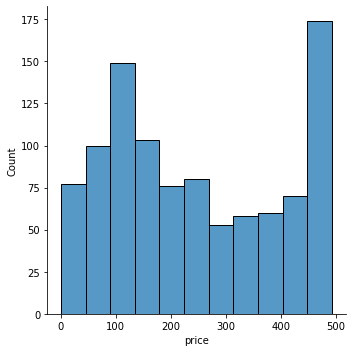

In [18]:
sns.displot(df['price'])

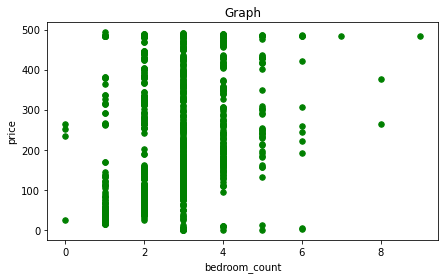

In [19]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('bedroom_count')
plt.ylabel('price')

plt.scatter(df['bedroom_count'],df['price'],s=30,alpha=1,color= 'g')

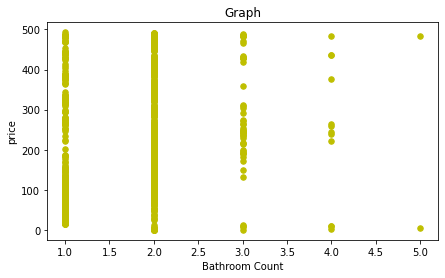

In [20]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Bathroom Count')
plt.ylabel('price')

plt.scatter(df['bathroom_count'],df['price'],s=30,alpha=1,color= 'y')

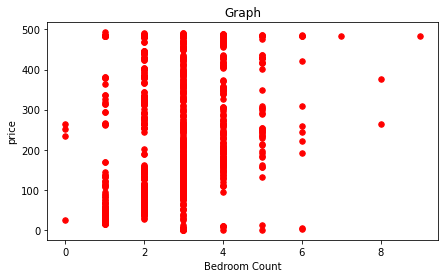

In [21]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Bedroom Count')
plt.ylabel('price')

plt.scatter(df['bedroom_count'],df['price'],s=30,alpha=1,color= 'r')

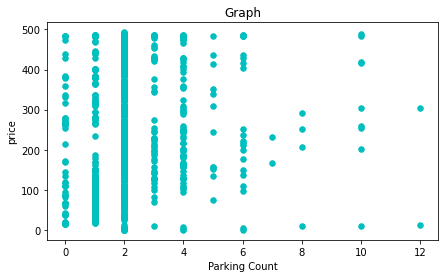

In [22]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Parking Count')
plt.ylabel('price')

plt.scatter(df['parking_count'],df['price'],s=30,alpha=1,color= 'c')

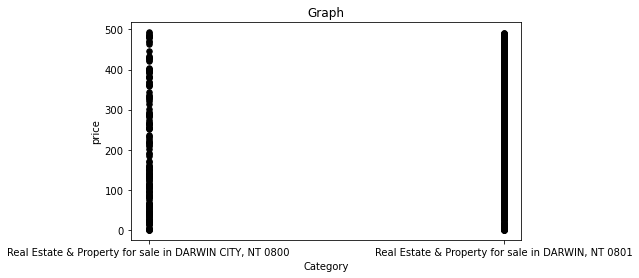

In [23]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Category')
plt.ylabel('price')

plt.scatter(df['category_name'],df['price'],s=30,alpha=1,color= 'k')

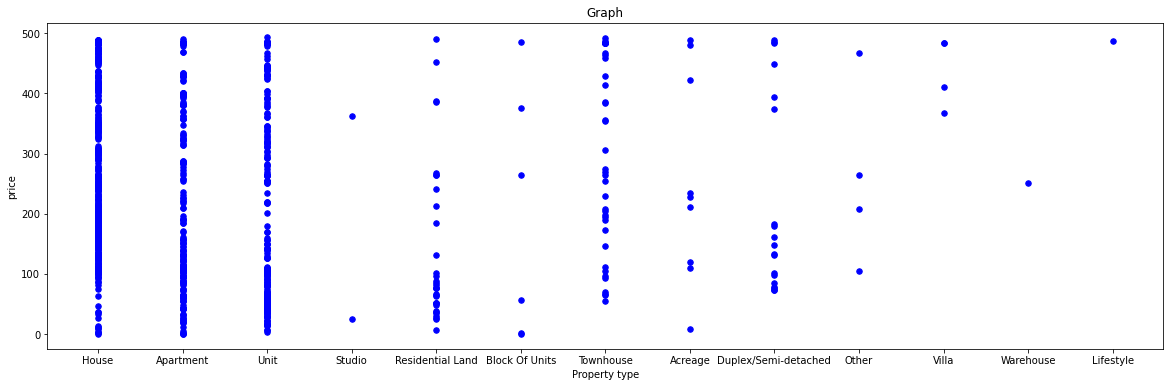

In [24]:
plt.figure(figsize = (20, 6))
plt.title('Graph')
plt.xlabel('Property type')
plt.ylabel('price')

plt.scatter(df['property_type'],df['price'],s=30,alpha=1,color= 'b')

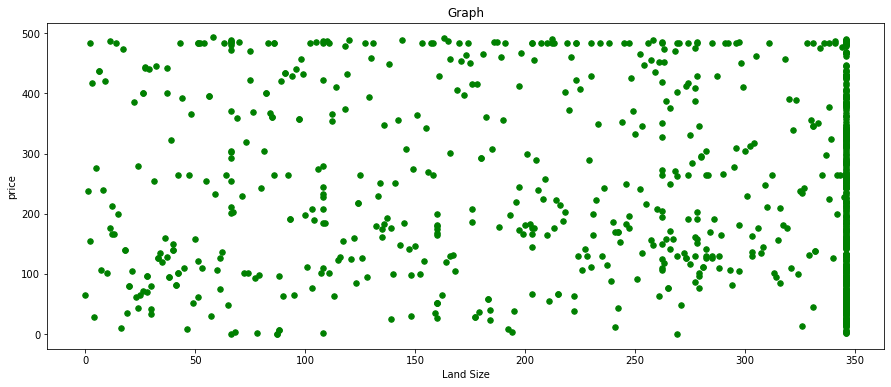

In [25]:
plt.figure(figsize = (15, 6))
plt.title('Graph')
plt.xlabel('Land Size')
plt.ylabel('price')

plt.scatter(df['land_size'],df['price'],s=30,alpha=1,color= 'g')

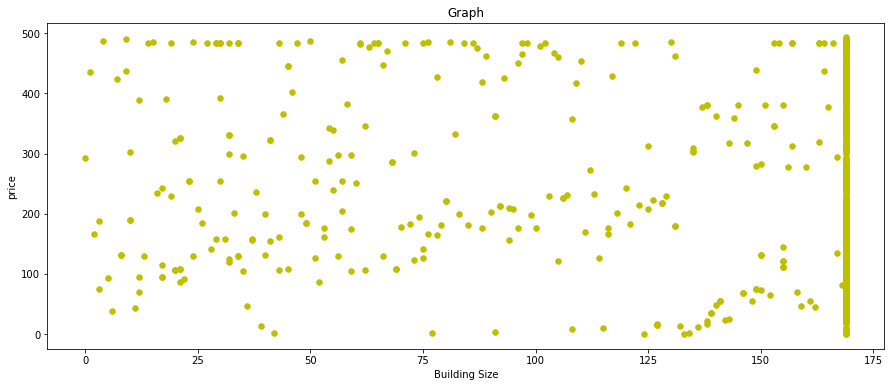

In [26]:
plt.figure(figsize = (15, 6))
plt.title('Graph')
plt.xlabel('Building Size')
plt.ylabel('price')

plt.scatter(df['building_size'],df['price'],s=30,alpha=1,color= 'y')

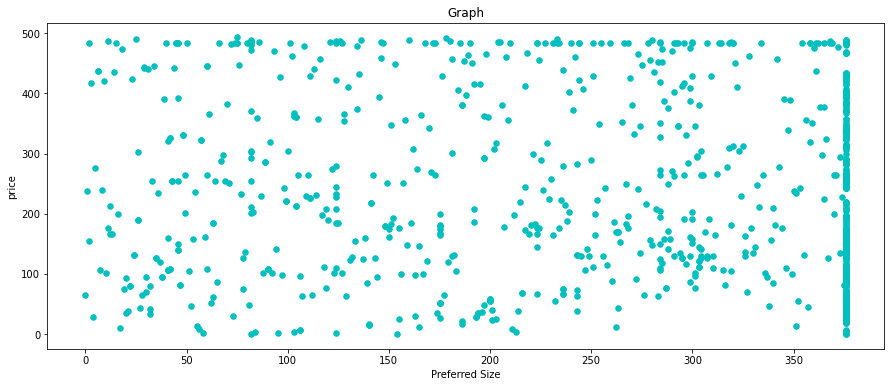

In [27]:
plt.figure(figsize = (15, 6))
plt.title('Graph')
plt.xlabel('Preferred Size')
plt.ylabel('price')

plt.scatter(df['preferred_size'],df['price'],s=30,alpha=1,color= 'c')

In [28]:
object_data = df.select_dtypes(include=['object'])
#to convert data of object type to numbers
encoder = preprocessing.LabelEncoder()
for i in range(object_data.shape[1]):
    object_data.iloc[:, i] = encoder.fit_transform(object_data.iloc[:, i])

#concat between data none object and data object after convert it
num_data = df.select_dtypes(exclude=['object'])
df = pd.concat([object_data, num_data], axis=1)

In [29]:
x = df.iloc[:, 0:22]
y = df.iloc[:, 16:17]
x = x.drop(['price'], axis = 1)

In [30]:
x

breadcrumb  category_name  property_type  listing_agency  location_type  \
0             1              0              4              56              0   
1             1              0              1              49              0   
2             1              0             10              35              0   
3             1              0              4              63              0   
4             1              0             10              12              0   
..          ...            ...            ...             ...            ...   
995           0              1              4              78              0   
996           0              1              4              41              0   
997           0              1              4              41              0   
998           0              1              4              41              0   
999           0              1             10              37              0   

     location_name  city  state  phone  product_depth  ...      TID  \
0              107    12      0     39              2  ...  1350988   
1              322    12      0      7              2  ...  1350989   
2               59    12      0     52              2  ...  1350990   
3               37    12      0     57              2  ...  1350991   
4              108    12      0     15              2  ...  1350992   
..             ...   ...    ...    ...            ...  ...      ...   
995            237    49      0     53              0  ...  1351983   
996            178    22      0     65              3  ...  1351984   
997            194    22      0     65              3  ...  1351985   
998            200    29      0     65              3  ...  1351986   
999             95    45      0     14              0  ...  1351987   

     building_size  land_size  preferred_size  open_date  location_number  \
0              169        346             376   2.000000        139468611   
1               41        346              57  13.000000        139463755   
2              169        346             376  14.000000        139462495   
3              169        346             376   8.000000        139451679   
4               69        346              90   8.000000        139433803   
..             ...        ...             ...        ...              ...   
995            169        325             350   0.000000        138346247   
996             70        188             207   2.592715        138333062   
997             74        262             284   2.592715        138333058   
998             48        160             175   2.592715        138333050   
999             12        346              30   2.592715        138330946   

     zip_code  bedroom_count  bathroom_count  parking_count  
0         800            2.0             1.0            1.0  
1         800            3.0             2.0            2.0  
2         800            2.0             1.0            1.0  
3         800            1.0             1.0            0.0  
4         800            3.0             2.0            2.0  
..        ...            ...             ...            ...  
995       834            4.0             3.0            6.0  
996       836            4.0             2.0            2.0  
997       836            4.0             2.0            2.0  
998       810            4.0             2.0            3.0  
999       820            2.0             2.0            2.0  

[1000 rows x 21 columns]

In [31]:
y

price
0      107
1      322
2       59
3       37
4      108
..     ...
995    237
996    178
997    194
998    200
999     95

[1000 rows x 1 columns]

In [32]:
# Data Normalizing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[1.        , 0.        , 0.33333333, ..., 0.22222222, 0.        ,
        0.08333333],
       [1.        , 0.        , 0.08333333, ..., 0.33333333, 0.25      ,
        0.16666667],
       [1.        , 0.        , 0.83333333, ..., 0.22222222, 0.        ,
        0.08333333],
       ...,
       [0.        , 1.        , 0.33333333, ..., 0.44444444, 0.25      ,
        0.16666667],
       [0.        , 1.        , 0.33333333, ..., 0.44444444, 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.83333333, ..., 0.22222222, 0.25      ,
        0.16666667]])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=44, shuffle =True)

## Decision Tree Classifier

In [34]:
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = dtc_clf.predict(x_test)

In [36]:
print('Decision Train Score is : ' , dtc_clf.score(x_train, y_train))
print('Decision Test Score is : ' , dtc_clf.score(x_test, y_test))

Decision Train Score is :  1.0
Decision Test Score is :  0.47


In [48]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='raw_values') 
print('Mean Squared Error Value is : ', np.sqrt(MSEValue))

Mean Squared Error Value is :  [19.05124668]


## Gradient Boosting Model

In [38]:
GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=10,learning_rate = 0.5 ,random_state=44)
GBRModel.fit(x_train, y_train)

print('GBRModel Train Score is : ' , GBRModel.score(x_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(x_test, y_test))

GBRModel Train Score is :  1.0
GBRModel Test Score is :  0.9999185826977303


In [43]:
y_pred = GBRModel.predict(x_test)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='raw_values') 
print('Mean Squared Error Value is : ', np.sqrt(MSEValue))

Mean Squared Error Value is :  [1.38054573]
